<a href="https://colab.research.google.com/github/stormfireuttam/Major-Project/blob/main/03%20Lane%20Detection/02%20Advanced%20Lane%20Detection/BasicsOfCalibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Basics of Calibration

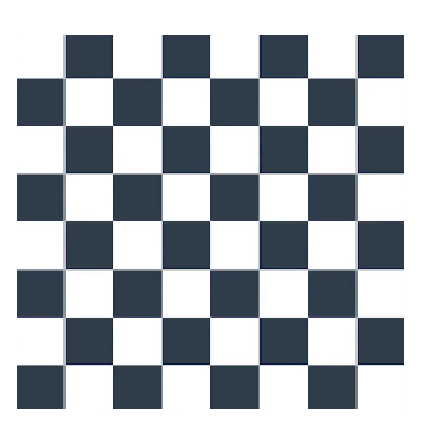

In [8]:
import cv2
from google.colab.patches import cv2_imshow

nx = 7
ny = 7
img = cv2.imread("/content/drive/MyDrive/GOOGLE COLAB NOTEBOOKS/Major Project/chess.png")
cv2_imshow(img)

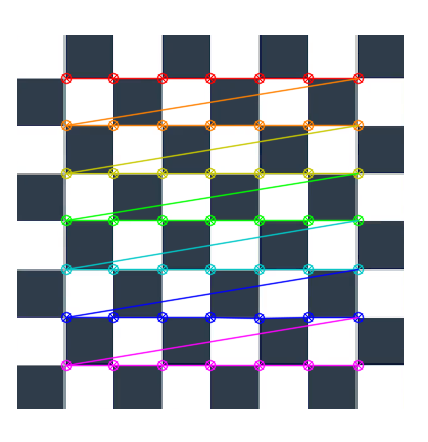

In [9]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

success, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
if success == True:
  cv2.drawChessboardCorners(img, (nx,ny), corners, success)
  cv2_imshow(img)